# 명함 디자인

In [4]:
from PIL import Image

In [28]:
# Canvas

x = 1028
y = 700

canvas = Image.new('RGB', (x,y), 'white')
canvas.save('biz_card.png')

In [30]:
# 로고 삽입
logo = Image.open('logo.png')
logo_x, logo_y = logo.size

# print(logo_x, logo_y)

new_logo_y = int(y * 0.3)
new_logo_x = int(logo_x * (new_logo_y/logo_y))

resized_logo = logo.resize((new_logo_x, new_logo_y))
logo.close()

In [32]:
canvas.paste(resized_logo, (int(x*0.05), int(y*0.05)))
canvas.save('biz_card.png')
resized_logo.close()

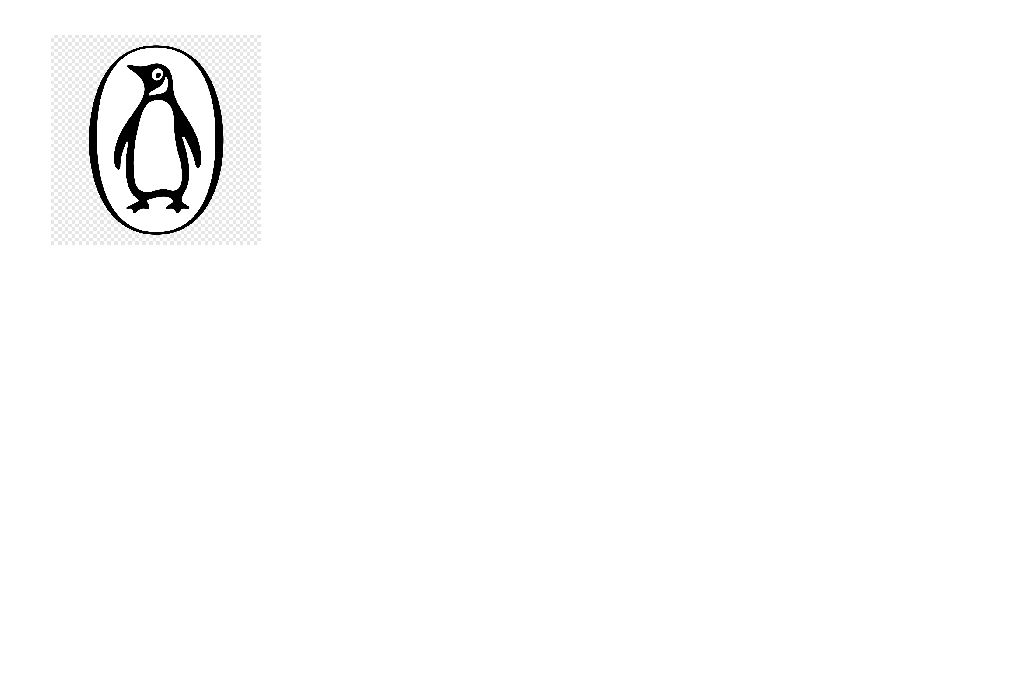

In [34]:
canvas

In [36]:
from PIL import ImageFont, ImageDraw

In [38]:
# 글자 삽입
location = '서울특별시 종로구 돈화문로 26 \n\n'
url = 'https://www.kgeduone.com/'

font = ImageFont.truetype('font/gulim.ttc', 30)
ImageDraw.Draw(canvas).text(xy=(x*0.07, y*0.7), text=location+'\n'+url,font=font,fill='black')

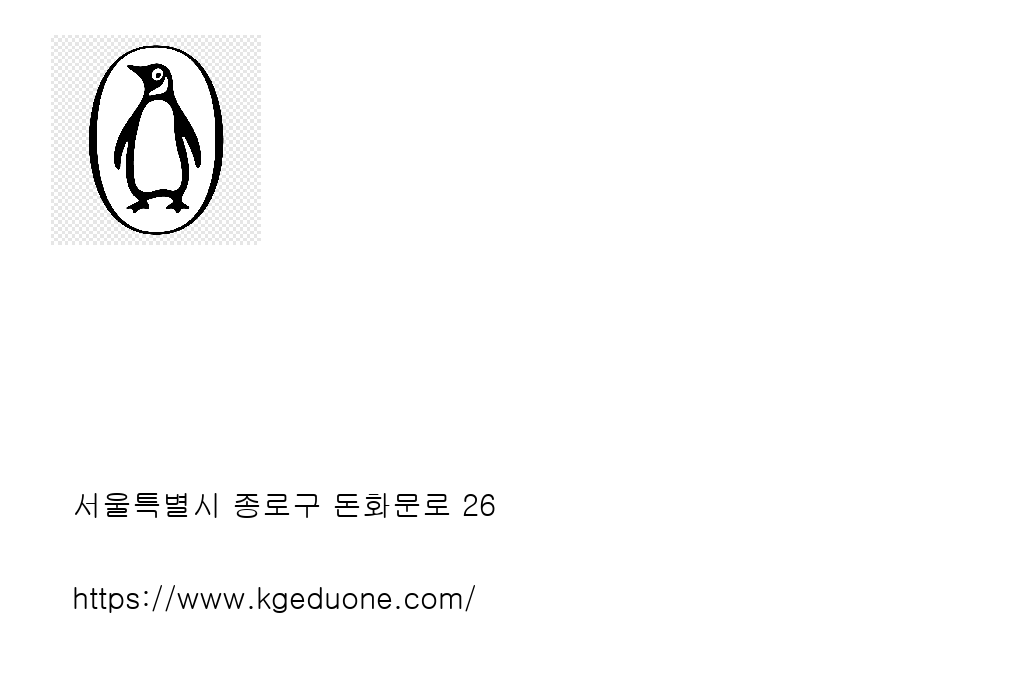

In [40]:
canvas

In [42]:
big_font = ImageFont.truetype('font/gulim.ttc', 50)
small_font = ImageFont.truetype('font/gulim.ttc', 30)


ImageDraw.Draw(canvas).text(xy=(x*0.6, y*0.2), text='정 요 한',font=big_font,fill='black')
ImageDraw.Draw(canvas).text(xy=(x*0.6, y*0.275), text='팀장 | 실습 2팀',font=small_font,fill='black')
ImageDraw.Draw(canvas).text(xy=(x*0.6, y*0.6), text='M: 010-1111-1111',font=small_font,fill='black')
ImageDraw.Draw(canvas).text(xy=(x*0.6, y*0.7), text='E: yohanch@gmail.com',font=small_font,fill='black')

canvas.save('biz_card.png')

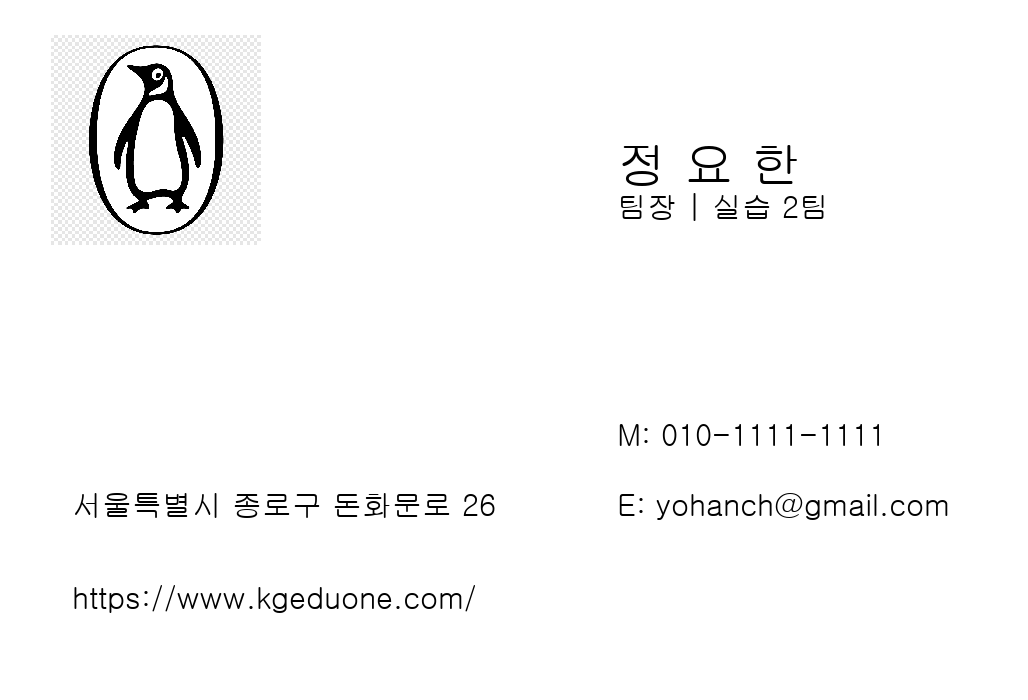

In [44]:
canvas

#### 가상정보들을 불러와 명암만들기

In [115]:
import pandas as pd
import random
import os

In [49]:
user_datas = pd.read_csv('virtual_member_data.csv', encoding='utf-8-sig')
user_datas.head()

,name,age,phone,email,gender
0,이지준,60,010-2512-7698,Cpt6KM@kgitbank.com,female
1,김도유,65,010-1401-7128,BfC9k@kgitbank.com,female
2,장민우,64,010-8980-0695,foCWlipF@kgitbank.com,male
3,이현은,65,010-3015-3429,7Pa9jHoQ@kgitbank.com,male
4,조주후,37,010-1553-5503,rrL9Tq5G@kgitbank.com,female


In [57]:
dept = ['경리부', '인사부', '기획부', '영업부', '회계부']
ls = []
for i in range(1000):
    ls.append(random.choice(dept))

In [61]:
user_datas['department'] = ls   # 만들어진 리스트를 해당 열에 주입

In [63]:
user_datas

,name,age,phone,email,gender,department
0,이지준,60,010-2512-7698,Cpt6KM@kgitbank.com,female,기획부
1,김도유,65,010-1401-7128,BfC9k@kgitbank.com,female,영업부
2,장민우,64,010-8980-0695,foCWlipF@kgitbank.com,male,경리부
3,이현은,65,010-3015-3429,7Pa9jHoQ@kgitbank.com,male,기획부
4,조주후,37,010-1553-5503,rrL9Tq5G@kgitbank.com,female,인사부
...,...,...,...,...,...,...
995,김하연,53,010-2414-8171,56lxdy5G@kgitbank.com,female,경리부
996,박도원,23,010-9511-0306,a6oGSm@kgitbank.com,male,회계부
997,조주유,64,010-1707-6072,zvZxdl068W@kgitbank.com,male,기획부
998,최도유,39,010-2610-6958,wFU7gJia@kgitbank.com,male,회계부


In [75]:
interasted = ['name', 'phone', 'email', 'department']   # 필요한 데이터만 따로 추출
user_datas[interasted].to_csv('info.csv', index=False)  

In [95]:
df = pd.read_csv('info.csv', encoding='utf-8-sig')
for d in df.iterrows():
    print(d['name'])

TypeError: tuple indices must be integers or slices, not str

In [121]:
def generate_auto_biz_card(user_list):
    
    if not os.path.exists('biz_card'):
        os.mkdir('biz_card')
    
    index = 1
    for name, department, phone, email in zip(user_list['name'],user_list['department'],user_list['phone'],user_list['email'],):
        x = 1028
        y = 700
        
        canvas = Image.new('RGB', (x,y), 'white')
        # 로고 삽입
        logo = Image.open('logo.png')
        logo_x, logo_y = logo.size
        
        # print(logo_x, logo_y)
        
        new_logo_y = int(y * 0.3)
        new_logo_x = int(logo_x * (new_logo_y/logo_y))
        
        resized_logo = logo.resize((new_logo_x, new_logo_y))
        logo.close()
        canvas.paste(resized_logo, (int(x*0.05), int(y*0.05)))
        resized_logo.close()
        
        # 글자 삽입
        location = '서울특별시 종로구 돈화문로 26 \n\n'
        url = 'https://www.kgeduone.com/'
        
        font = ImageFont.truetype('font/gulim.ttc', 30)
        ImageDraw.Draw(canvas).text(xy=(x*0.07, y*0.7), text=location+'\n'+url,font=font,fill='black')
        
        big_font = ImageFont.truetype('font/gulim.ttc', 50)
        small_font = ImageFont.truetype('font/gulim.ttc', 30)
        
        
        ImageDraw.Draw(canvas).text(xy=(x*0.6, y*0.2), text=name,font=big_font,fill='black')
        ImageDraw.Draw(canvas).text(xy=(x*0.6, y*0.275), text=department,font=small_font,fill='black')
        ImageDraw.Draw(canvas).text(xy=(x*0.6, y*0.6), text='M: ' + phone,font=small_font,fill='black')
        ImageDraw.Draw(canvas).text(xy=(x*0.6, y*0.7), text='E: ' + email,font=small_font,fill='black')
        
        canvas.save('biz_card/'+'{:0>4}'.format(str(index))+'_'+name+'.png')
        canvas.close()
        index += 1

In [123]:
generate_auto_biz_card(df)

#### 사운증 디자인
- 사원증에는 사진이 필요함-> Augmentation 기법을 이용해 하나의 사진으로 여러 사진을 생성
- Augmentation: a survey on Image Augmentation for Deep learning

In [125]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 2.3 MB/s eta 0:00:17
    --------------------------------------- 0.5/38.8 MB 6.7 MB/s eta 0:00:06
    --------------------------------------- 1.0/38.8 MB 7.5 MB/s eta 0:00:06
   - -------------------------------------- 1.2/38.8 MB 7.2 MB/s eta 0:00:06
   - -------------------------------------- 1.6/38.8 MB 7.2 MB/s eta 0:00:06
   - -------------------------------------- 1.8/38.8 MB 6.8 MB/s eta 0:00:06
   -- ------------------------------------- 2.1/38.8 MB 6.6 MB/s eta 0:00:06
   -- ------------------------------------- 2.4/38.8 MB 6.5 MB/s eta 0:00:06
   -- ------------------------------------- 2.7/38.8 MB 6.5 MB/s eta 0:00:06
   --- ------------------------------------ 2.9/38.8 MB 6.5 MB/s eta 0:00:06
   --- ------------------------------------ 3.2/38.8 MB 6.5 MB/s eta 0:00:06
   --- ------------------------------------ 3.5/38.8 MB 6.4 MB/s eta 0:00:06
   ---

In [127]:
import cv2
import matplotlib.pyplot as plt


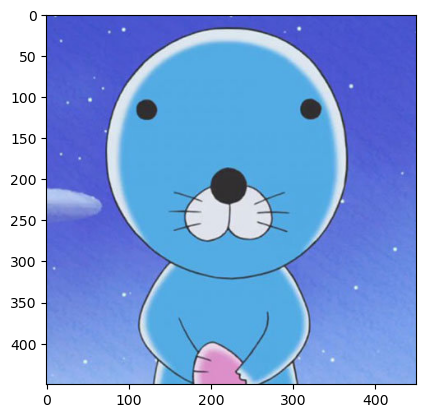

In [129]:
img = cv2.cvtColor(cv2.imread('face.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [131]:
import numpy as np

# augmentation이 적용된 img들을 시각화하는 함수
def show_aug_image(image, generator, n_images=4):

    image_batch = np.expand_dims(image, axis=0)
    generator.fit(image_batch) 
    data_gen_iter = generator.flow(image_batch)
    fig, axs = plt.subplots(nrows=1, ncols=n_images, figsize=(24, 8))
    
    for i in range(n_images):
        aug_image_batch = next(data_gen_iter)
        aug_image = np.squeeze(aug_image_batch) 
        aug_image = aug_image.astype('int') 
        axs[i].imshow(aug_image)
        cv2.imwrite('pororo' + '/' + str(i+1) + '.png', aug_image)

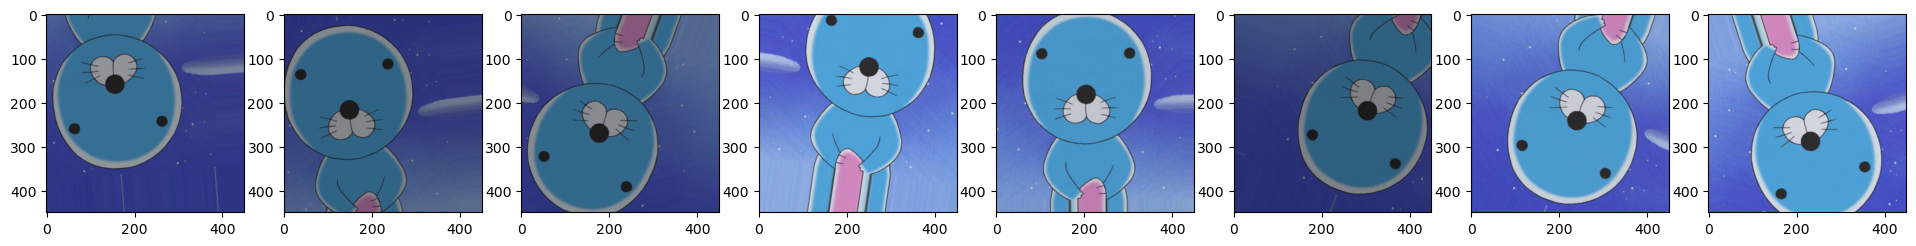

In [143]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(
    horizontal_flip=True, vertical_flip=True, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, brightness_range=(0.5, 1))

show_aug_image(img, data_generator, n_images=8)

In [173]:
template = Image.new('RGB', (800, 1260), 'white')
x, y = template.size

big_font = ImageFont.truetype('font/gulim.ttc', 50)
small_font = ImageFont.truetype('font/gulim.ttc', 30)

url = "www.kgeduone.com"
ImageDraw.Draw(template).text(xy=(int(x*0.95-small_font.getlength(url)), int(y*0.02)),
                             text=url, font=small_font, fill='black')

logo = Image.open('logo.png')
logo_x, logo_y = logo.size
new_logo_x = int(x * 0.2)
new_logo_y = int(logo_y * (new_logo_x / logo_x))
resized_logo = logo.resize((new_logo_x, new_logo_y))
template.paste(resized_logo, (int(x*0.1), int(y*0.95 - new_logo_y)))
logo.close()

photo = Image.open('face.jpg')
template.paste(photo, ((int(x/4), int(y/2.5 - x/2*(4/3)/2))))

name = "정 요 한"
dept = "팀장 | 실습팀"

ImageDraw.Draw(template).text(xy=(int(x*0.4), int(y*0.7)),
                             text=name, font=big_font, fill='black')
ImageDraw.Draw(template).text(xy=(int(x*0.4), int(y*0.75)),
                             text=dept, font=small_font, fill='black')

template.save('sawon.png')
template.close()

In [161]:
template

<PIL.Image.Image image mode=RGB size=800x1260>